In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import ticker
import sys
import itertools
sys.path.append('/Users/willbarnes/Documents/Rice/Research/EBTEL_analysis/src')
import ebtel_configure as ebc
import ebtel_plot as ebp
import ebtel_run as ebr
reload(ebc)
reload(ebr)
reload(ebp)

ImportError: No module named 'ebtel_configure'

#Coronal Loops Workshop VII poster figures

In [163]:
clw_fs = 22.0
clw_figsize = (18,9)
clw_format = 'png'
clw_dpi = 300

In [164]:
def tick_maker(old_ticks,n):
    if n < 2:
        raise ValueError('n must be greater than 1')
        
    n = n-1
    delta = (old_ticks[-1] - old_ticks[0])/n
    new_ticks = []
    for i in range(n):
        new_ticks.append(old_ticks[0] + i*delta)
        
    new_ticks.append(old_ticks[0] + n*delta)
    return new_ticks

def my_formatter_2f(x,p):
    return "%.2f" % (x)

def my_formatter_1f(x,p):
    return "%.1f" % (x)

##HYDRAD Comparisons

First, do a single-event comparison with HYDRAD and the two-fluid EBTEL code.

In [165]:
#build input dictionary
#Configure all static dictionary options
config_dict = {'usage_option':'dem','rad_option':'rk','dem_option':'new','heat_flux_option':'limited','solver':'rka4','ic_mode':'force','print_plasma_params':'True'}
config_dict['output_file'] = '/Users/willbarnes/Documents/Rice/Research/research_notebook/ebtel_data/ebtel_compare_1-event'
config_dict['total_time'] = 2700
config_dict['tau'] = 1.0
config_dict['rka_error'] = 1.0e-6
config_dict['index_dem'] = 451
config_dict['sat_limit'] = 1.0
config_dict['h_back'] = 3.32e-5
config_dict['heating_shape'] = 'triangle'
config_dict['t_start_switch'] = 'uniform'
config_dict['t_end_switch'] = 'uniform'
config_dict['T0'] = 7.928e+5
config_dict['n0'] = 1.61e+8
config_dict['t_start'] = 0.0
config_dict['t_pulse_half'] = 250.0
config_dict['mean_t_start'] = 1000
config_dict['std_t_start'] = 1000

#Configure directory-level parameters
config_dict['num_events'] = 1
config_dict['heat_species'] = 'electron'
config_dict['amp_switch'] = 'uniform'
config_dict['alpha'] = -1.5
config_dict['loop_length'] = 25.0
config_dict['amp0'] = 0.05
config_dict['amp1'] = 0.5
config_dict['h_nano'] = 0.05

In [166]:
#print xml configuration file
configurer = ebc.Configurer(config_dict,'ebtel_data/')
configurer.print_xml_config(config_file=config_dict['output_file']+'.xml')

In [167]:
#run the model
runner = ebr.Runner('/Users/willbarnes/Documents/Rice/Research/EBTEL-2fluid_repo/bin/','/Users/willbarnes/Documents/Rice/Research/research_notebook/ebtel_data/')
runner.run_ebtel_single('ebtel_compare_1-event.xml')

************************************************************************************
            Enthalpy Based Thermal Evolution of Loops (EBTEL)						
			   Two-fluid Model											
************************************************************************************

Original single-fluid code written in IDL by J.A. Klimchuk, S. Patsourakos, P.J. Cargill
See Klimchuk, J.A, S. Patsourakos & P.J. Cargill 2008, ApJ 682:1351-2362
See also Cargill, P.J., S.J. Bradshaw & J.A. Klimchuk 2012, ApJ 752:161-174

Translation into the C Programming Language by Will Barnes,
Dept. of Physics & Astronomy, Rice University (2014)
************************************************************************************

INPUTS
------
Total time: 2700 s
Time step: 1.000000 s
Loop half-length: 25.000000 Mm
Usage option(see documentation): dem
Heating pulse shape: triangle
Heating species: electron
Solving equations using adaptive fourth order Runge-Kutta routine
Using Raymond-Klimchuk Loss Function
Using li

In [168]:
#load the data
#ebtel
data = np.loadtxt('ebtel_data/ebtel_compare_1-event.txt')
eb_1_event_time = data[:,0]
eb_1_event_temp_e = data[:,1]
eb_1_event_temp_i = data[:,2]
eb_1_event_dens = data[:,3]
eb_1_event_temp_apex_e = data[:,7]
eb_1_event_temp_apex_i = data[:,8]
eb_1_event_dens_apex = data[:,9]
eb_1_event_heat = data[:,15]
#hydrad
data = np.loadtxt('ebtel_data/hydrad_compare_1-event.txt')
hy_1_event_time = data[:,0]
hy_1_event_dens = data[:,1]
hy_1_event_temp_e = data[:,2]
hy_1_event_temp_i = data[:,3]

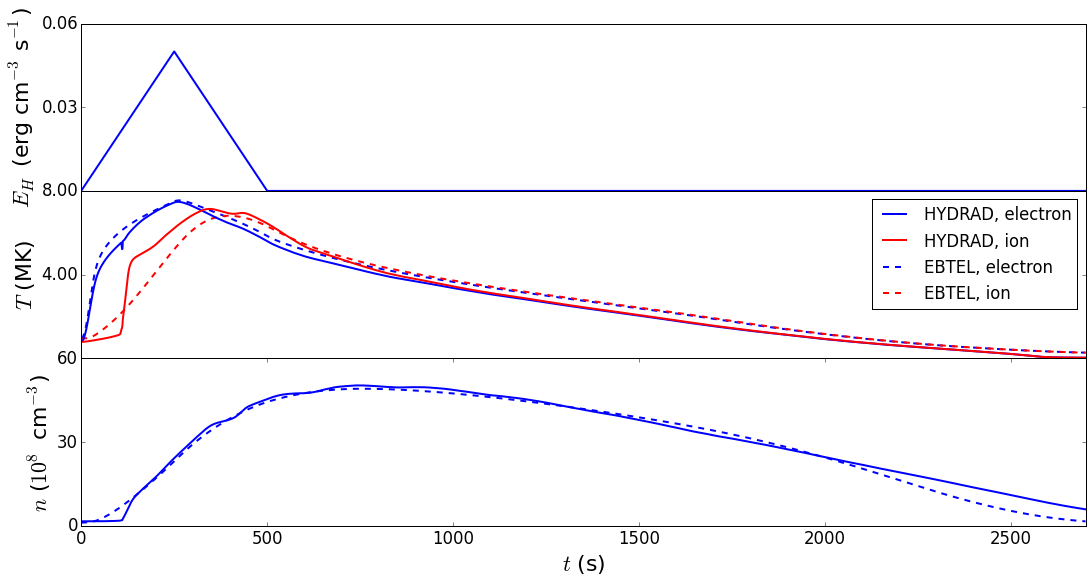

In [169]:
#construct figure
fig,ax = plt.subplots(3,1,figsize=clw_figsize)
plt.subplots_adjust(hspace=0.0)
#heating
ax[0].plot(eb_1_event_time,eb_1_event_heat,linewidth=2.0)
#temperature
lee = ax[1].plot(eb_1_event_time,eb_1_event_temp_apex_e/1.0e+6,'b--',linewidth=2.0,label=r'EBTEL, electron')
lei = ax[1].plot(eb_1_event_time,eb_1_event_temp_apex_i/1.0e+6,'--r',linewidth=2.0,label=r'EBTEL, ion')
lhe = ax[1].plot(hy_1_event_time,hy_1_event_temp_e/1.0e+6,'b',linewidth=2.0,label=r'HYDRAD, electron')
lhi = ax[1].plot(hy_1_event_time,hy_1_event_temp_i/1.0e+6,'r',linewidth=2.0,label=r'HYDRAD, ion')
#density
ax[2].plot(eb_1_event_time,eb_1_event_dens_apex/1.0e+8,'b--',linewidth=2.0)
ax[2].plot(hy_1_event_time,hy_1_event_dens/1.0e+8,'b',linewidth=2.0)
#cosmetic
#0
ax[0].set_xticks([])
ax[0].set_xlim([0,2700])
tick_temp = ax[0].get_yticks()
ax[0].set_yticks(tick_maker(tick_temp,3)[1:])
ax[0].tick_params(axis='y',labelsize=clw_fs*0.75)
ax[0].get_yaxis().set_major_formatter(ticker.FuncFormatter(my_formatter))
#1
ax[1].set_xticks([])
ax[1].set_xlim([0,2700])
tick_temp = ax[1].get_yticks()
ax[1].set_yticks(tick_maker(tick_temp,3)[1:])
ax[1].tick_params(axis='y',labelsize=clw_fs*0.75)
ax[1].get_yaxis().set_major_formatter(ticker.FuncFormatter(my_formatter))
#2
tick_temp = ax[2].get_yticks()
ax[2].set_yticks(tick_maker(tick_temp,3))
ax[2].tick_params(axis='both',labelsize=clw_fs*0.75)
ax[2].set_xlim([0,2700])
#labels
ax[0].set_ylabel(r'$E_H$ (erg cm$^{-3}$ s$^{-1}$)',fontsize=clw_fs)
ax[1].set_ylabel('$T$ (MK)',fontsize=clw_fs)
ax[2].set_ylabel('$n$ ($10^8$ cm$^{-3}$)',fontsize=clw_fs)
ax[2].set_xlabel('$t$ (s)',fontsize=clw_fs)
#legend
lines = lhe + lhi + lee + lei 
labels = [l.get_label() for l in lines]
ax[1].legend(lines,labels,fontsize=clw_fs*0.75,loc=1)
plt.savefig('/Users/willbarnes/Documents/Rice/Posters/loops_workshop_2015/figures/compare_1_event.'+clw_format,format=clw_format,dpi=clw_dpi)

##Heating Events

Compute heating statistics sample for $\alpha=-1.5$, electron heating, $L=40.0$ Mm, $T_N=5000$ s.

In [170]:
def calc_total_events(t_tot,t_pulse,t_n,N_tot):
    N_N = int(np.ceil(t_tot/(t_pulse+t_n)))
    N_MC = int(np.ceil(N_tot/N_N))
    return N_N,N_MC
#define some typical parameters
ttotal = 8.0e+4
tpulse = 1.0e+2
tn = np.arange(250,5250,250)
N_tot = 1.0e+4
#iterate over tn values
nn_list = []
nmc_list = []
for i in range(len(tn)):
    nn_temp,nmc_temp = calc_total_events(ttotal,tpulse,tn[i],N_tot)
    nn_list.append(nn_temp),nmc_list.append(nmc_temp)

In [171]:
def data_loader(species,alpha,loop_length,t_wait,tot_events):
    tot_event_list = []
    file_format = '/Users/willbarnes/Documents/Rice/Research/research_notebook/ebtel_data/ebtel_L%.1f_tn%d_tpulse100.0_rka4/ebtel_L%.1f_tn%d_tpulse100.0_rka4_%d_heat_amp.txt'
    for i in range(tot_events):
        temp = np.loadtxt(file_format%(loop_length,t_wait,loop_length,t_wait,i))
        tot_event_list.append(temp)
    #flatten list
    tot_event_list = list(itertools.chain(*tot_event_list))
    return tot_event_list

In [172]:
#declare instance of plotter class
plotter = ebp.Plotter(format=clw_format,figsize=clw_figsize,dpi=clw_dpi,fs=clw_fs)
plotter.events = data_loader('electron',1.5,40.0,5000,np.array(nmc_list)[np.where(tn==5000)])
plotter.plot_event_distribution(print_fig_filename='/Users/willbarnes/Documents/Rice/Posters/loops_workshop_2015/figures/heating_stats')

No file specified. Variable namespace will not be populated.


(-1.5759555580299076, 0.080641361763415215)

Show examples of power-law and uniform amplitudes as well as a couple of different heating frequencies.

In [173]:
#load the heating profiles for the two uniform cases
data = np.loadtxt('ebtel_data/ebtel_L40.0_tn500_tpulse100.0_euler_0.txt')
q_uni_500 = data[:,15]
t_uni_500 = data[:,0]
data = np.loadtxt('ebtel_data/ebtel_L40.0_tn5000_tpulse100.0_euler_0.txt')
q_uni_5000 = data[:,15]
t_uni_5000 = data[:,0]
q_pl_1000_amps = np.loadtxt('ebtel_data/ebtel_L40.0_tn1000_tpulse100.0_rka4_9_heat_amp.txt')

In [174]:
#construct profile for power-law case
start_times = []
end_times = []
[start_times.append(i*(tpulse + 1000.0)) for i in range(np.array(nn_list)[np.where(tn==1000)])]
[end_times.append(start_times[i] + tpulse) for i in range(np.array(nn_list)[np.where(tn==1000)])]
q_bg = 3.4e-6
q_pl_1000 = np.zeros(int(ttotal))
t_pl_1000 = np.arange(0,ttotal)
for i in range(int(ttotal)):
    q_pl_1000[i] = q_bg
    for j in range(np.array(nn_list)[np.where(tn==1000)]):
        if i > start_times[j] and i < end_times[j]:
            if i < start_times[j]+tpulse/2.0:
                q_pl_1000[i] = q_pl_1000[i] + q_pl_1000_amps[j]*(i - start_times[j])/(tpulse/2.0)
            else:
                q_pl_1000[i] = q_pl_1000[i] - q_pl_1000_amps[j]*(i - end_times[j])/(tpulse/2.0)

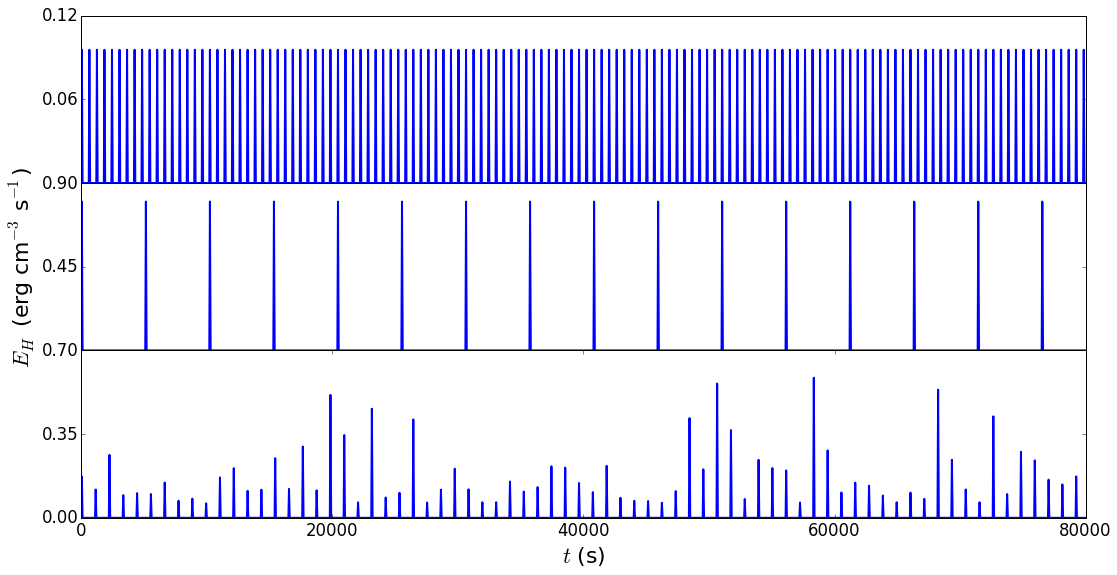

In [175]:
fig,ax = plt.subplots(3,1,figsize=clw_figsize)
plt.subplots_adjust(hspace=0.0)
#uniform tn=250
ax[0].plot(t_uni_500,q_uni_500,'b',linewidth=2.0)
#uniform tn=5000
ax[1].plot(t_uni_5000,q_uni_5000,'b',linewidth=2.0)
#power_law tn=1000
ax[2].plot(t_pl_1000,q_pl_1000,'b',linewidth=2.0)
#cosmetic
#0
ax[0].set_xticks([])
tick_temp = ax[0].get_yticks()
ax[0].set_yticks(tick_maker(tick_temp,3)[1:])
ax[0].tick_params(axis='y',labelsize=clw_fs*0.75)
ax[0].get_yaxis().set_major_formatter(ticker.FuncFormatter(my_formatter))
#1
ax[1].set_xticks([])
tick_temp = ax[1].get_yticks()
ax[1].set_yticks(tick_maker(tick_temp,3)[1:])
ax[1].tick_params(axis='y',labelsize=clw_fs*0.75)
ax[1].get_yaxis().set_major_formatter(ticker.FuncFormatter(my_formatter))
#2
tick_temp = ax[2].get_xticks()
ax[2].set_xticks(tick_maker(tick_temp,5))
tick_temp = ax[2].get_yticks()
ax[2].set_yticks(tick_maker(tick_temp,3))
ax[2].tick_params(axis='both',labelsize=clw_fs*0.75)
ax[2].get_yaxis().set_major_formatter(ticker.FuncFormatter(my_formatter))
#labels
ax[1].set_ylabel(r'$E_H$ (erg cm$^{-3}$ s$^{-1}$)',fontsize=clw_fs)
ax[2].set_xlabel(r'$t$ (s)',fontsize=clw_fs)
plt.savefig('/Users/willbarnes/Documents/Rice/Posters/loops_workshop_2015/figures/heating_functions.'+clw_format,format=clw_format,dpi=clw_dpi)